<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E9%9B%BB%E7%A3%81%E5%AD%B8/electric_fileds_of_a_dipol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

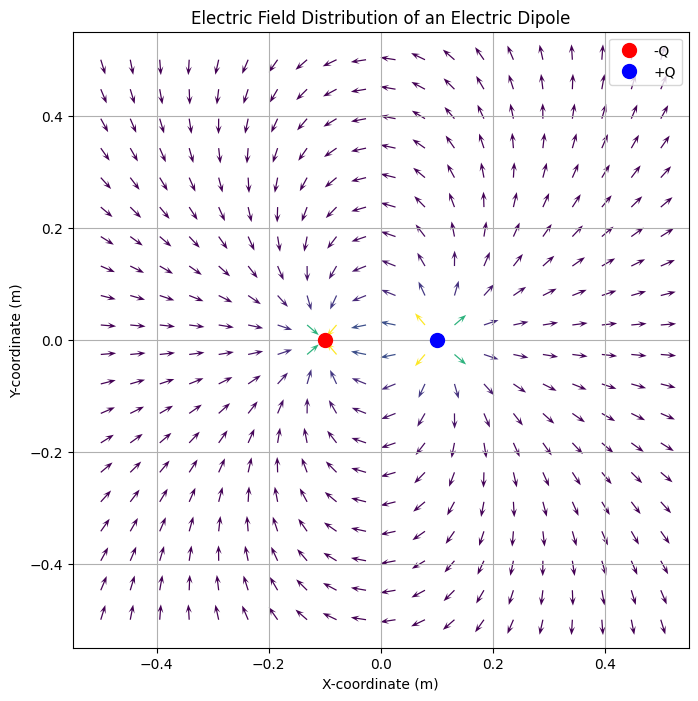

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.9875e9  # Coulomb's constant (Nm^2/C^2)
charge_magnitude = 1e-9  # Magnitude of each charge (C)
d = 0.1  # Distance from origin to each charge (m)

# Positions of the charges
charge1_pos = np.array([-d, 0])  # Negative charge on the left
charge2_pos = np.array([d, 0])   # Positive charge on the right

# Create a grid for plotting the electric field
x = np.linspace(-0.5, 0.5, 20)  # x-coordinates
y = np.linspace(-0.5, 0.5, 20)  # y-coordinates
X, Y = np.meshgrid(x, y)

# Function to calculate electric field from a point charge
def electric_field_point_charge(q, r_charge, r_field):
    vec_r = r_field - r_charge
    dist_r = np.linalg.norm(vec_r)
    if dist_r == 0:
        return np.array([0.0, 0.0]) # Avoid division by zero at the charge location
    return (k * q / dist_r**3) * vec_r

# Calculate electric field components (Ex, Ey) for the dipole
Ex = np.zeros(X.shape)
Ey = np.zeros(Y.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        field_point = np.array([X[i, j], Y[i, j]])

        # Field due to negative charge (-charge_magnitude)
        E1 = electric_field_point_charge(-charge_magnitude, charge1_pos, field_point)

        # Field due to positive charge (+charge_magnitude)
        E2 = electric_field_point_charge(charge_magnitude, charge2_pos, field_point)

        # Superposition of fields
        E_total = E1 + E2
        Ex[i, j] = E_total[0]
        Ey[i, j] = E_total[1]

# Normalize the field vectors for better visualization
E_magnitude = np.sqrt(Ex**2 + Ey**2)
# Avoid division by zero for points where E_magnitude is 0
Ex_norm = np.divide(Ex, E_magnitude, out=np.zeros_like(Ex), where=E_magnitude!=0)
Ey_norm = np.divide(Ey, E_magnitude, out=np.zeros_like(Ey), where=E_magnitude!=0)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the electric field vectors
ax.quiver(X, Y, Ex_norm, Ey_norm, E_magnitude, cmap='viridis', scale=40, width=0.002, headwidth=5, headlength=7)

# Plot the charges
ax.plot(charge1_pos[0], charge1_pos[1], 'ro', markersize=10, label='-Q') # Negative charge (red circle)
ax.plot(charge2_pos[0], charge2_pos[1], 'bo', markersize=10, label='+Q') # Positive charge (blue circle)

ax.set_xlabel('X-coordinate (m)')
ax.set_ylabel('Y-coordinate (m)')
ax.set_title('Electric Field Distribution of an Electric Dipole')
ax.set_aspect('equal', adjustable='box')
ax.legend()
ax.grid(True)
plt.show()